In [25]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns

In [26]:
experiment_type = 'reward-network-iii-6A-v2'
experiment_type = 'reward-network-iii-6B-v1'
experiment_type = 'reward-network-iii-7B-v1'
experiment_type = 'reward-network-iii-8B-v1'
# experiment_type = 'reward-network-iii-8A-v1'
experiment_type = 'reward-network-iii-8A-v2'
experiment_type = 'reward-network-iii-pilot-9D-v4'
# experiment_type = 'reward-network-iii-pilot-10B-v4'
# experiment_type = 'sim_3states_8r_v8'
# experiment_type = 'reward-network-iii-exp-v2'

# experiment_type = 'sim_3states_8r_v4'
moves_df = pd.read_csv(os.path.join('./data/pilots/',experiment_type,'moves.csv'))

moves_df['condition'] = moves_df['condition'].fillna('none')

<Axes: xlabel='trial_id', ylabel='session_name'>

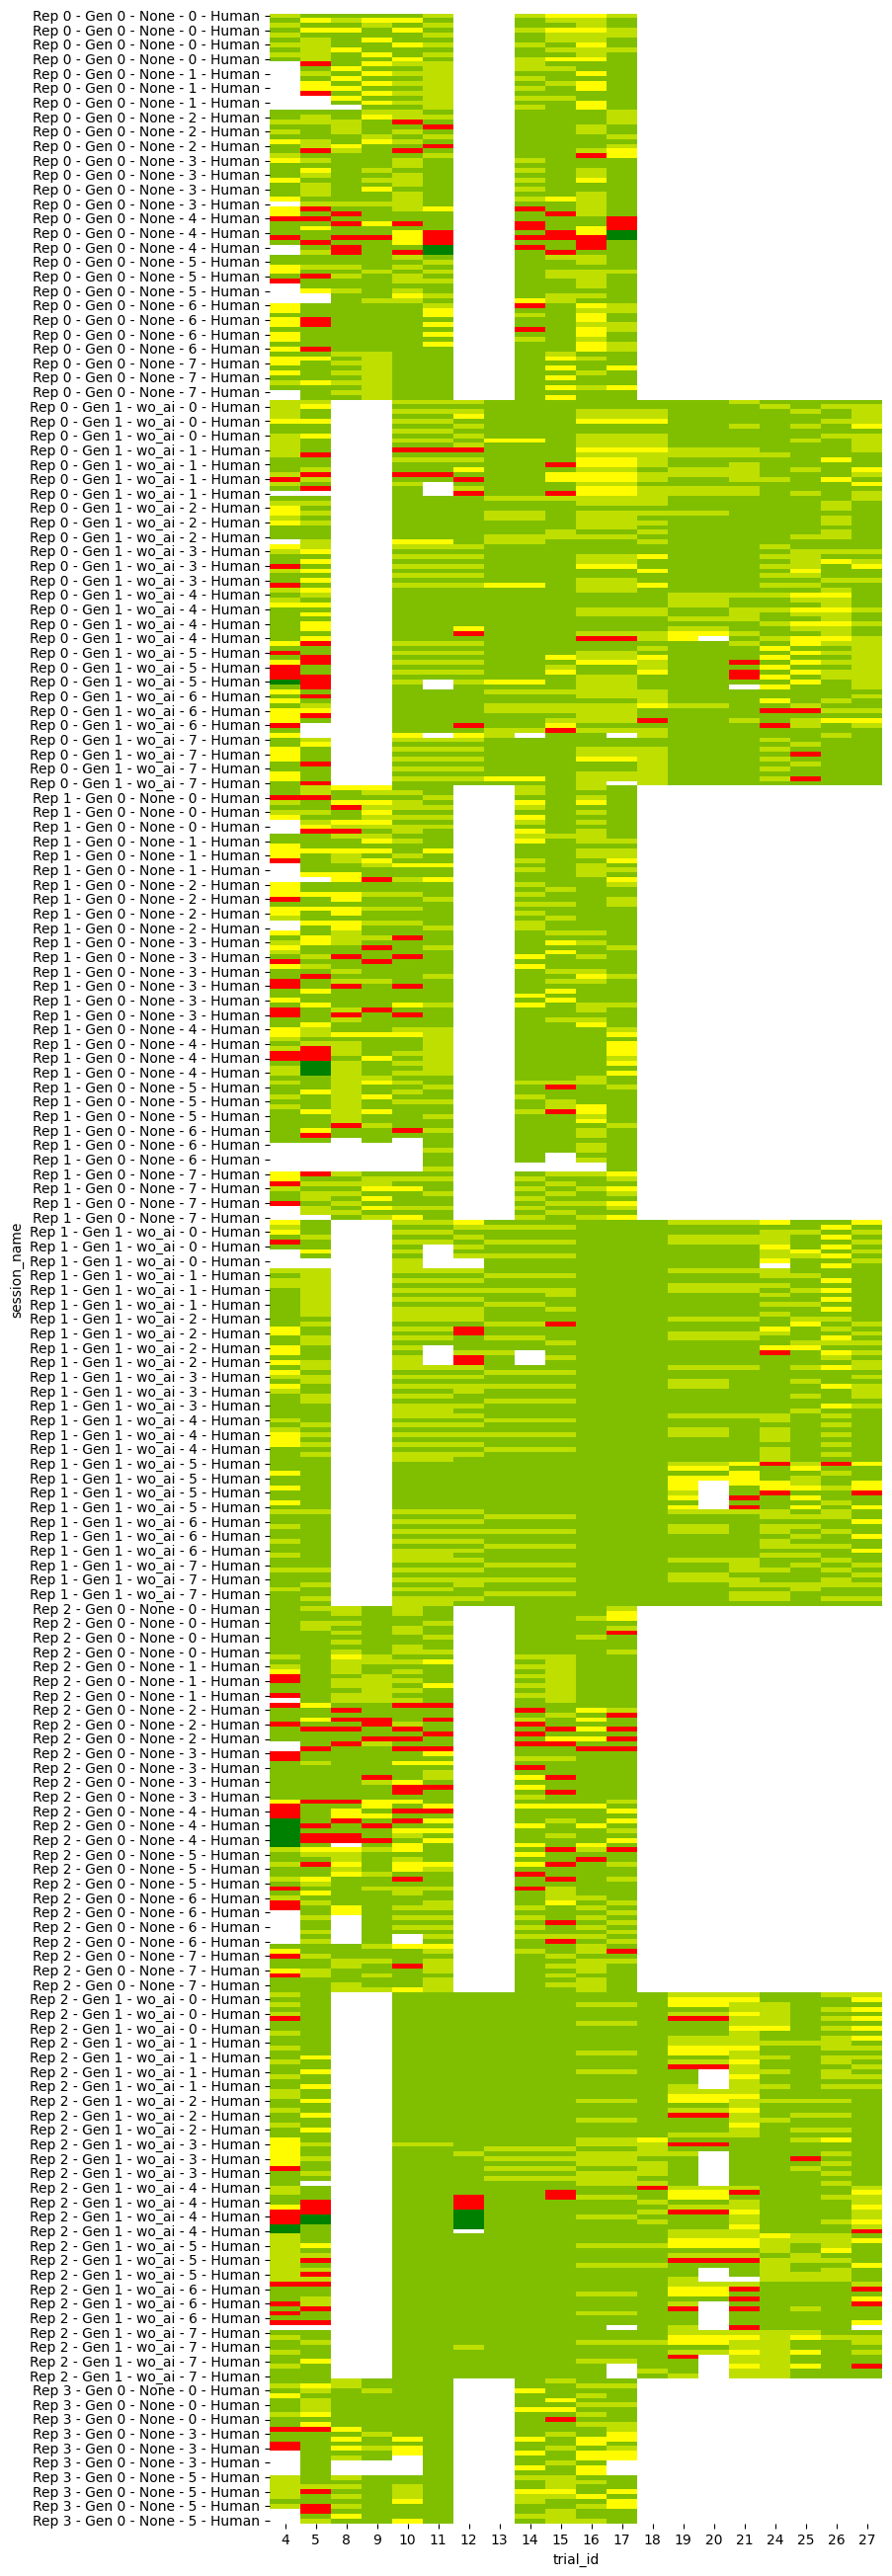

In [27]:
moves_matrix = moves_df.pivot_table(index=['player_score', 'session_name', 'move_idx'], columns=['trial_id'], values='reward')
n_sessions = len(moves_matrix.index.levels[0])

# drop all index but session_name
moves_matrix = moves_matrix.sort_index(level=[1,2], ascending=True)
moves_matrix = moves_matrix.reset_index(level=[0,2], drop=True)


# Original nodes and colors
nodes = np.array([-50, 0, 400])
colors = ["red", "yellow", "green"]

# Normalize nodes to be in the range [0, 1]
norm_nodes = (nodes - nodes.min()) / (nodes.max() - nodes.min())
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", list(zip(norm_nodes, colors)))

plt.figure(figsize=(8, n_sessions))

sns.heatmap(moves_matrix, cmap=cmap, cbar=False, vmin=-50, vmax=400)


In [46]:
counts = moves_df.groupby(['session_id', 'generation','trial_type']).size().reset_index()
counts.groupby(['generation', 'trial_type'])[0].value_counts(normalize=False).sort_values(ascending=False)

generation  trial_type     0 
0           demonstration  40    26
1           observation    40    25
            demonstration  40    23
            try_yourself   40    21
            individual     20    19
0           individual     60    12
1           repeat         40    12
0           individual     58     4
1           try_yourself   39     3
            repeat         37     3
                           33     3
0           individual     59     3
                           45     2
1           demonstration  39     2
            individual     18     2
            repeat         39     2
            individual     19     2
0           individual     57     2
1           individual     14     1
            try_yourself   38     1
            repeat         38     1
                           35     1
                           34     1
0           demonstration  32     1
1           repeat         32     1
0           individual     28     1
1           individual     17     

In [47]:
moves_df.session_id.nunique()

53

<Axes: xlabel='trial_id', ylabel='session_name'>

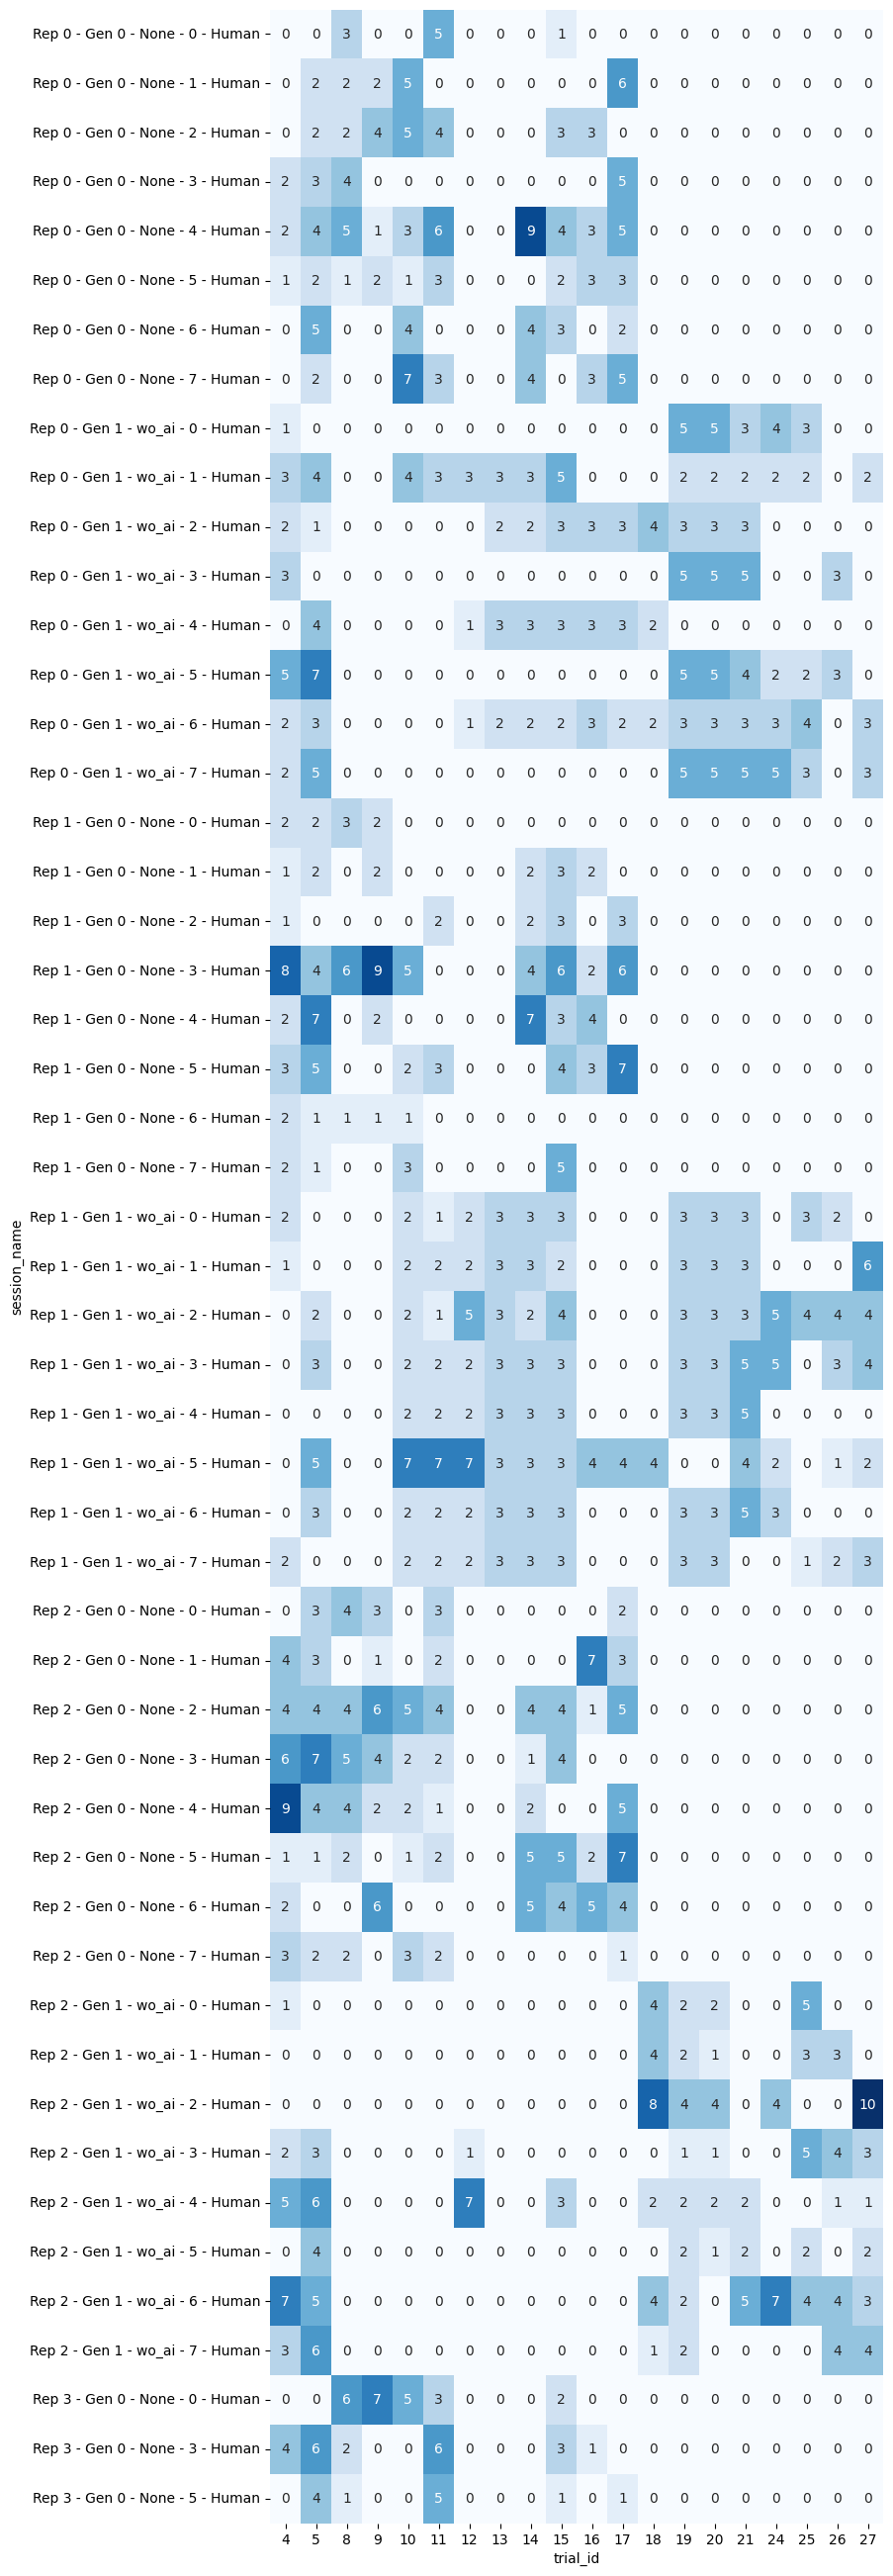

In [28]:
plt.figure(figsize=(8, n_sessions))

moves_matrix = moves_df.pivot_table(index=['session_name'], columns=['trial_id'], values='optimal', aggfunc='sum')

moves_matrix = moves_matrix.fillna(0).astype(int)

sns.heatmap(moves_matrix, cmap='Blues', cbar=False, fmt='d', annot=True)


<Axes: xlabel='trial_id', ylabel='session_name'>

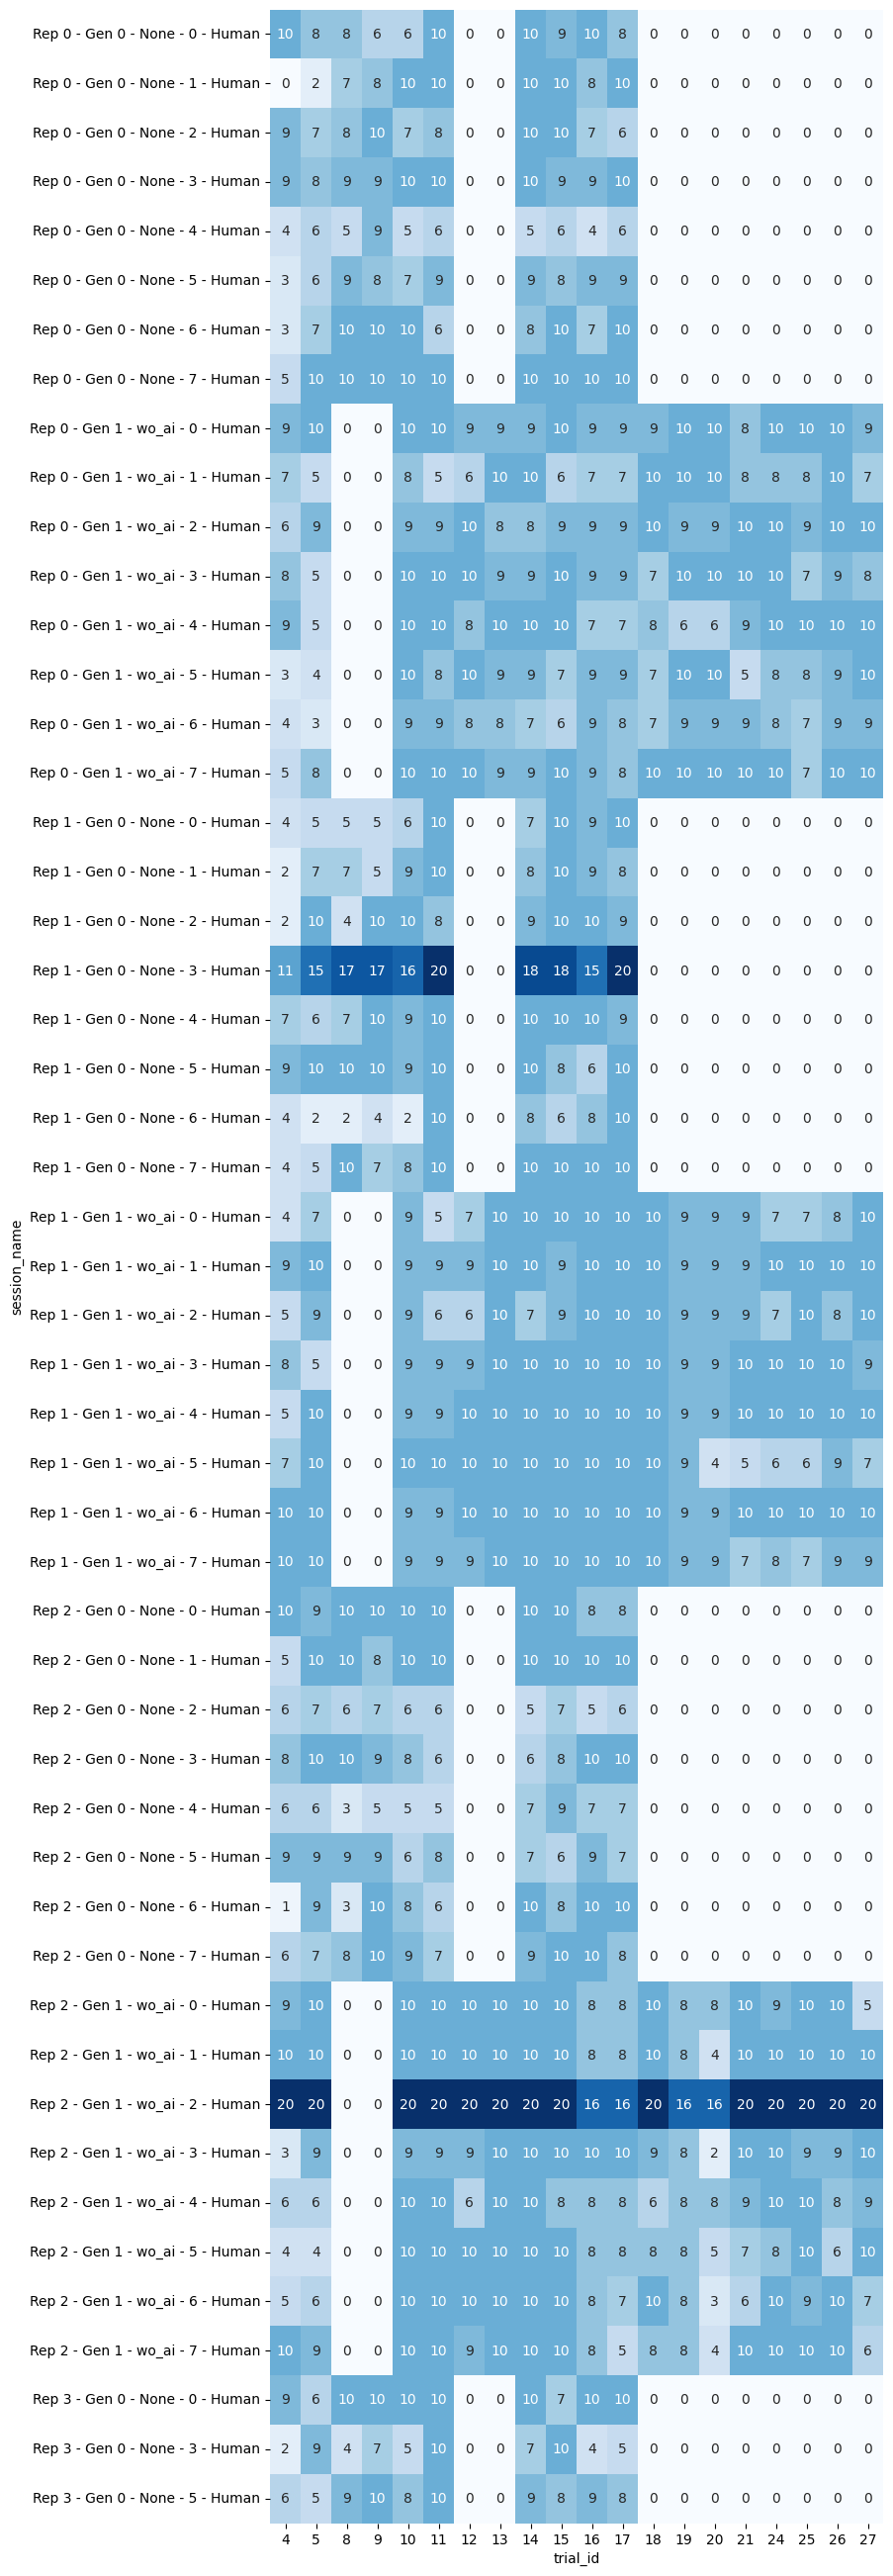

In [29]:
plt.figure(figsize=(8, n_sessions))


moves_matrix = moves_df.pivot_table(index=['session_name'], columns=['trial_id'], values='myopic', aggfunc='sum')

moves_matrix = moves_matrix.fillna(0).astype(int)

sns.heatmap(moves_matrix, cmap='Blues', cbar=False, fmt='d', annot=True)


<Axes: xlabel='trial_id', ylabel='session_name'>

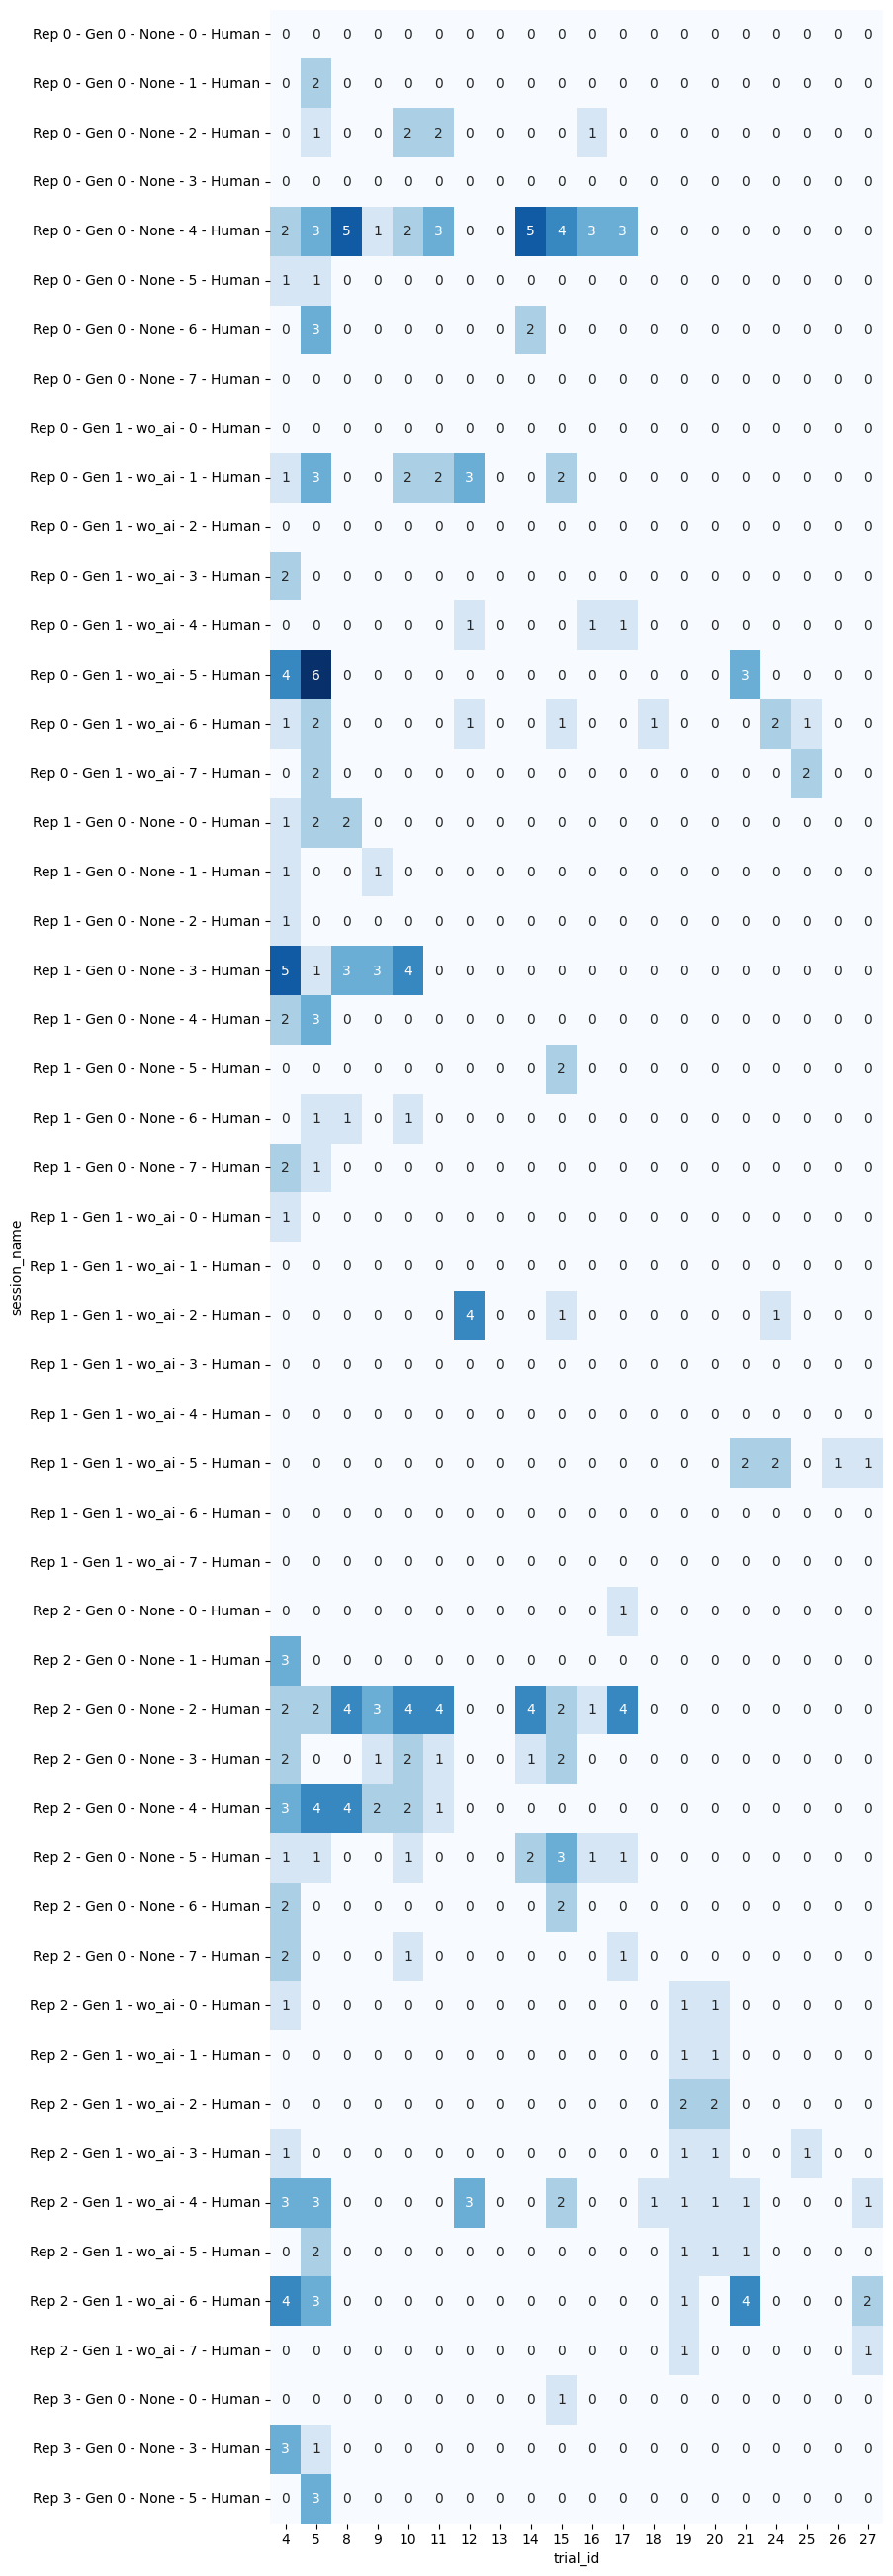

In [30]:
plt.figure(figsize=(8, n_sessions))

moves_matrix = moves_df.pivot_table(index=['session_name'], columns=['trial_id'], values='large_loss_taken', aggfunc='sum')

moves_matrix = moves_matrix.fillna(0).astype(int)

sns.heatmap(moves_matrix, cmap='Blues', cbar=False, fmt='d', annot=True)


In [31]:
# large_loss_taken, myopic, optimal

moves_behavior = moves_df.melt(id_vars=['session_id', 'condition', 'trial_id', 'generation'], value_vars=['myopic', 'optimal'], var_name='behavior', value_name='count')


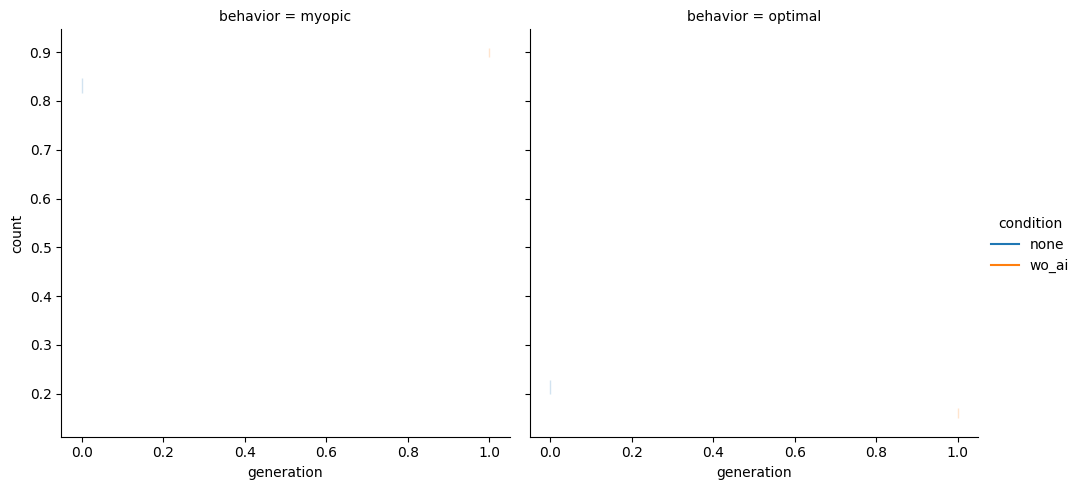

In [32]:
sns.relplot(data=moves_behavior, x='generation', y='count', col='behavior', hue='condition', kind='line')


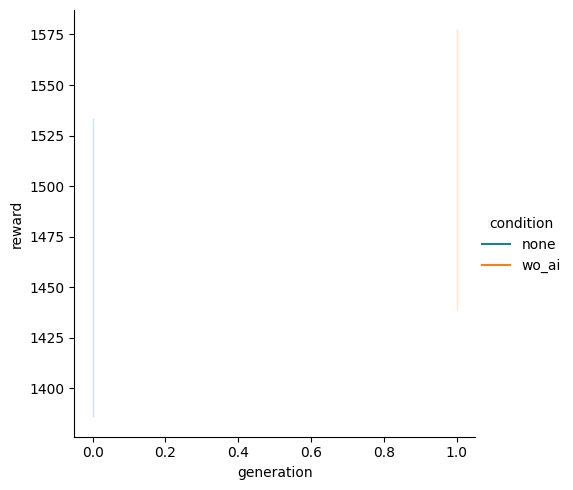

In [33]:
df = moves_df[moves_df['trial_type'] == 'demonstration']
df = df.groupby(['session_id', 'trial_id', 'condition', 'generation'])['reward'].sum().reset_index()

sns.relplot(data=df, x='generation', y='reward', hue='condition', kind='line')

<Axes: xlabel='generation,condition'>

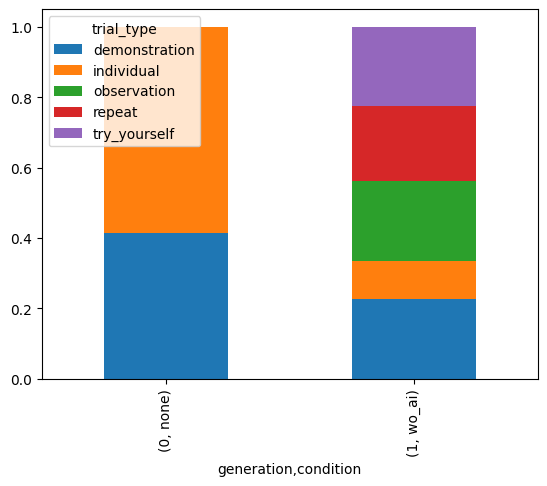

In [34]:
moves_df.groupby(['generation', 'condition'])['trial_type'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)

In [35]:
moves_df.groupby(['generation', 'condition', 'trial_type'])['solution_total_score'].max()

generation  condition  trial_type   
0           none       demonstration    2000
                       individual       2250
1           wo_ai      demonstration    2000
                       individual       2000
                       observation      2000
                       repeat           2000
                       try_yourself     2000
Name: solution_total_score, dtype: int64